# Project Description

**The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912.
It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether
or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.** 


# Attribute Information

**Passenger id- Unique Id of the passenger**

**Pclass- Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)**

**Survived- Survived (0 = No; 1 = Yes)**

**Name- Name of the passenger**

**Sex- Sex of the passenger (Male, Female)**

**Age- Age of the passenger**

**Sibsp- Number of Siblings/Spouses Aboard**

**Parch- Number of Parents/Children Aboard**

**Ticket- Ticket Number**

**Fare- Passenger Fare (British pound)**

**Cabin- Cabin**

**Embarked- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)**



In [137]:
#Importing the necessory libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import joblib

from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier ,AdaBoostClassifier,BaggingClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics  
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [67]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv')

In [68]:
df.head(20) #Displaying the first 20 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [69]:
df.tail(20)  #Displaying the last 20 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


**==>This dataset contains the details of sinking of the ‘Unsinkable’ ship Titanic in early 1912.**

**==>This dataset have both numerical(continous) and categorical data**

**==>In this Dataset,"Survived" is the target variable , it have 0(not survived) and 1(survived)**

**==>We have to predict if an arbitrary passenger on Titanic would survive the sinking or not.**

# Exploratory Data Analysis (EDA)(Non Graphical Analysis)¶

In [70]:
df.shape #checking the dimension of the dataset

(891, 12)

**Data set contains 891 rows and 12 Columns(from this 1 column is target variable ,then others are independent variables)**

In [71]:
print(f"Columns Names:{df.columns}") #columns of the dataset

Columns Names:Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [72]:
df.dtypes #data types of the data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**This dataset contains**

**==>2 float64 value columns** 

**==>5 int64 value columns**

**==>5 object value columns**

In [73]:
#Checking the null values

df.isnull().sum().to_frame()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**The column Age,Cabin and Embarked have null values**

**1)Age column has 177 null values that means 177/891(891 is total records),So we can fill this null values using  median**

**2)Cabin column has 687 null values that means 687/891,if we fill this null values it will affect the target variable .Dropping this feature from the Dataset is the better way to do**

**3)Embarked has 2 null values.we will deal this or drop them**

In [74]:
df.isnull().sum().sum() #Total sum of non-null values

866

<Axes: >

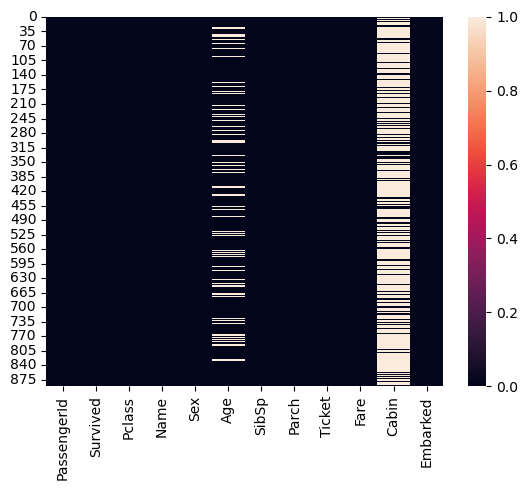

In [75]:
#Let's visualize missing values using heatmap
sns.heatmap(df.isnull())

**We can see there is more missing values in Cabin when compared to Age column**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Here we can see the datatypes and missing values are presented

# Filling Null values

## ==>Age Column

In [77]:
 df['Age'].fillna(df['Age'].median(),inplace=True) #Filling the null values using median


# ==>Embarked Column

In [78]:
 df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)  #Filling null values using mode

In [79]:
for i in df.columns:
    print(df[i].value_counts().to_frame()) #cheching the value count of each column
    print('\n')

             count
PassengerId       
1                1
599              1
588              1
589              1
590              1
...            ...
301              1
302              1
303              1
304              1
891              1

[891 rows x 1 columns]


          count
Survived       
0           549
1           342


        count
Pclass       
3         491
1         216
2         184


                                          count
Name                                           
Braund, Mr. Owen Harris                       1
Boulos, Mr. Hanna                             1
Frolicher-Stehli, Mr. Maxmillian              1
Gilinski, Mr. Eliezer                         1
Murdlin, Mr. Joseph                           1
...                                         ...
Kelly, Miss. Anna Katherine "Annie Kate"      1
McCoy, Mr. Bernard                            1
Johnson, Mr. William Cahoone Jr               1
Keane, Miss. Nora A                           1
Dooley, Mr. P

In [80]:
df.nunique().to_frame("No. of unique Values")

,No. of unique Values
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


**From above analysis(value counts and unique values)**

**1)PassengerId has 891 unique values,this column only help to identify the passenger but does'nt influence the target variable,so we can drop it**

**2)Our Taregt variable Survived has two unique values(Binary classification),so it is a classification problem**

**3)Pclass(passenger class) has 3 unique values 1,2,3 .so it is categorical column**

**4)Name has 891 unique values,this column only help to identify the passenger name but does'nt influence the target variable,so we can drop it**

**5)Sex has 2 unique values Male and Female.so it is categorical column**

**6)Age has 88 unique values**

**7)Sibcp( Number of Siblings/Spouses Aboard) has 7 unique values**

**8)parch( Number of Parents/Children Aboard) has 7 unique values**

**9)Ticket has 681 unique values,this column only help to identify the Ticket related information but does'nt influence the target variable,so we can drop it**

**10)Fare has 248 unique values and it is numerical continous variable**

**11)Cabin has 147 unique values but it has more null values if we fill the missing values, it will affect the target variable .Dropping this feature is the better way to do.**

**12)Emarked has 3 unique values.so it is categorical column**



# Dropping Feature (PassengerId ,Name,Ticket,Cabin) 

**Reason for this was mentioned in above cell**

In [81]:
new_df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [82]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [83]:
new_df.shape #Dimension of the column after dropping the unwanted column

(891, 8)

# Again Checking Missing values

In [84]:
#Checking the null values

new_df.isnull().sum().to_frame()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


<Axes: >

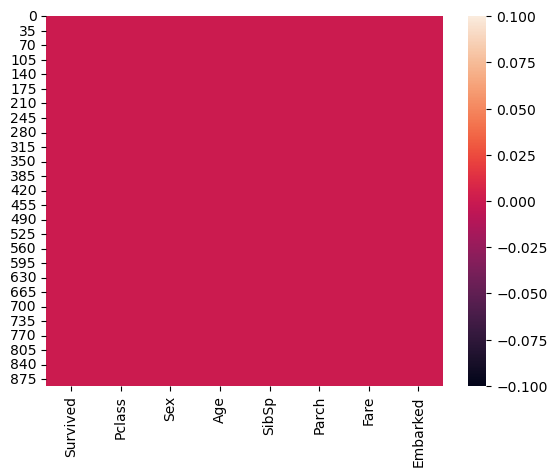

In [85]:
#Let's visualize missing values using heatmap
sns.heatmap(new_df.isnull())

**From above Analysis,There is no missing values**

In [86]:
#Summary of the numerical columns
new_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**1)We have to consider only Age and Fare other than all are categorical which represented by numerical value**

**2)There is no negative value present**

**3)The mean value is greater than the median(50%) in age and fare columns which means the data is skewed to right.**

**4)There is a huge difference between 75% and max in age and fare hence there are outliers present in the data**

**5)we can also notice the**

   **==>standard deviation**
    
   **==>min**
    
   **==>25% percentile value for age and fare from this describe method.**

# Data Visulisation(Grapical Analysis)

# Univarite Analysis(for Survived column)

Survived
0    549
1    342
Name: count, dtype: int64


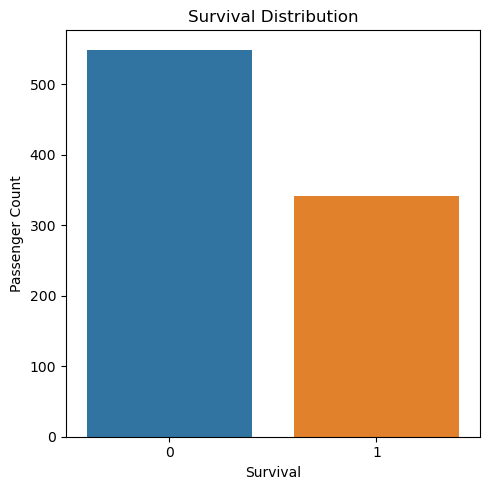

In [87]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Survived',data=new_df)
plt.xlabel("Survival")
plt.ylabel("Passenger Count")
plt.title('Survival Distribution')
plt.tight_layout()

print(new_df['Survived'].value_counts())

**Out of 891 passengers,only 342 have surived .The target variable is imbalanced**

# P class

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


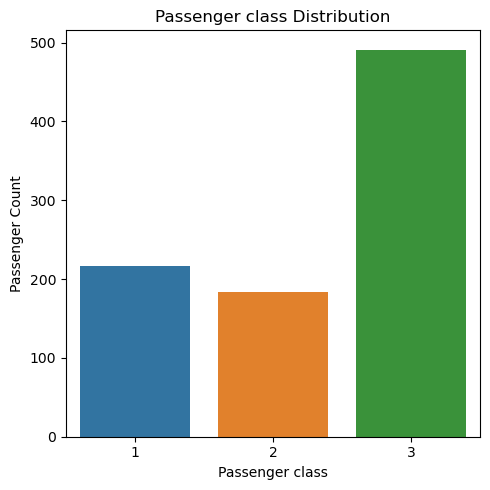

In [88]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Pclass',data=new_df)
plt.xlabel("Passenger class")
plt.ylabel("Passenger Count")
plt.title('Passenger class Distribution')
plt.tight_layout()

print(new_df['Pclass'].value_counts())

**More passengers occured in 3rd class(total 491) when compare to others**

# Gender

Sex
male      577
female    314
Name: count, dtype: int64


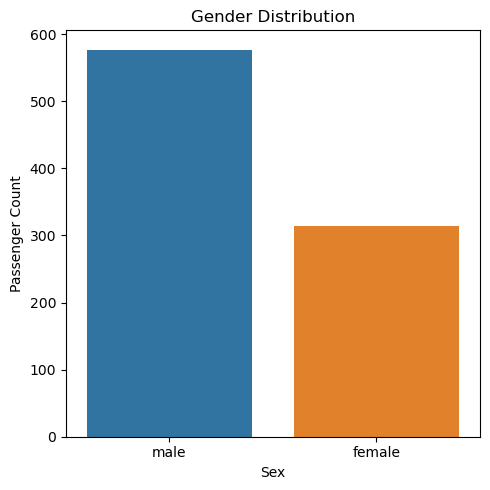

In [89]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Sex',data=new_df)
plt.ylabel("Passenger Count")
plt.title('Gender Distribution')
plt.tight_layout()

print(new_df['Sex'].value_counts())

**Male Count=577**

**Female Count=314**

# SibSp

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


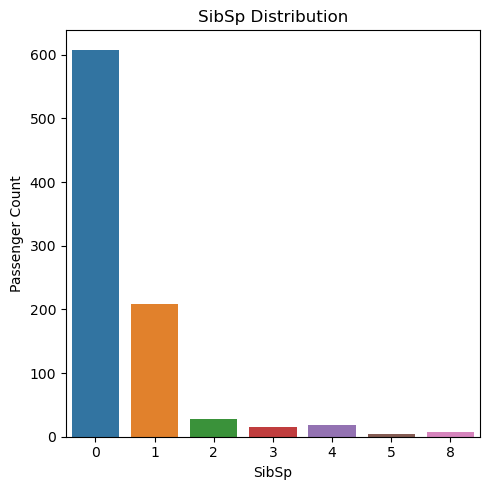

In [90]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='SibSp',data=new_df)
plt.ylabel("Passenger Count")
plt.title('SibSp Distribution')
plt.tight_layout()

print(new_df['SibSp'].value_counts())

**608 passengers travelling without siblings or spouses rest of others are travelling with siblings and spouses like 1 member ,
2 and more**


# Parch

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


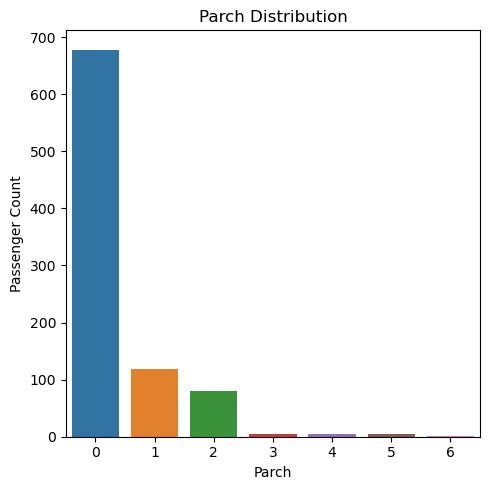

In [91]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Parch',data=new_df)
plt.ylabel("Passenger Count")
plt.title('Parch Distribution')
plt.tight_layout()

print(new_df['Parch'].value_counts())

**678 passengers travelling without parents or children rest of others are travelling with  relatives like 1 member,
2 and more**

# Embarked

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


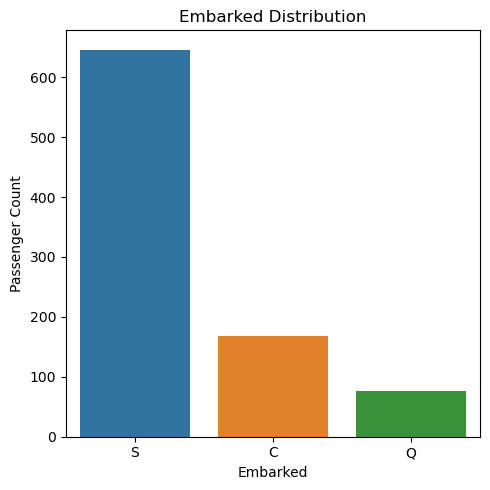

In [92]:
plt.figure(figsize=(5,5))
ax=sns.countplot(x='Embarked',data=new_df)
plt.ylabel("Passenger Count")
plt.title('Embarked Distribution')
plt.tight_layout()

print(new_df['Embarked'].value_counts())

**passengers Embarked in**

**Southampton=646(total passengers)**

**Cherbourg=168**

**Queenstown=77**

# Bivariate Analysis(comparing each feature with target variable or label)¶

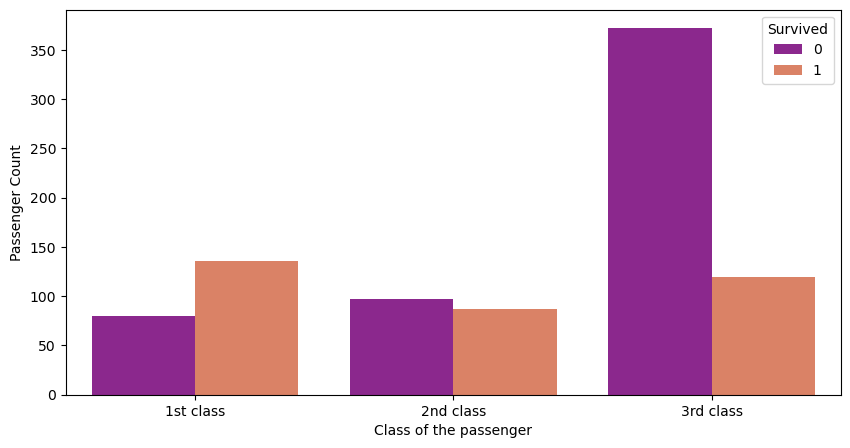

In [93]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass',data=new_df,palette='plasma',hue='Survived')
plt.xlabel('Class of the passenger')
plt.ylabel('Passenger Count')
plt.xticks((0,1,2),['1st class','2nd class','3rd class'])
plt.show()

**The passengers in the third class have more survival rate when compare to other two classes**

# SibSp

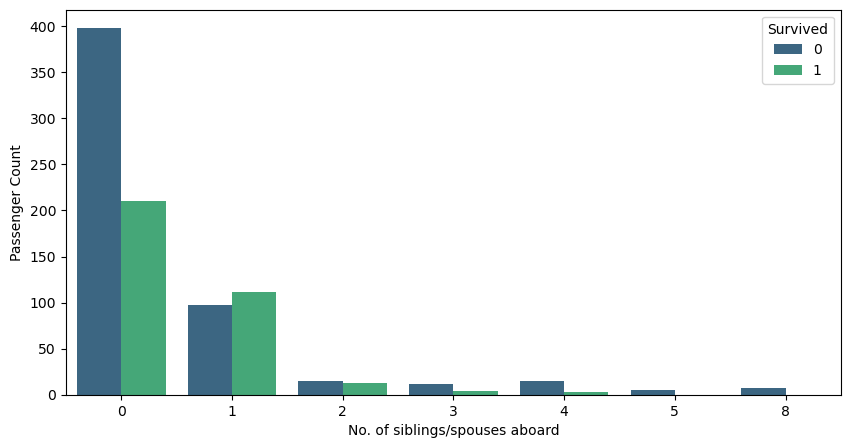

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x='SibSp',data=new_df,palette='viridis',hue='Survived')
plt.xlabel('No. of siblings/spouses aboard')
plt.ylabel('Passenger Count')
plt.show()

**The passengers with 0 siblings ,most of them did'not survive**

# Parch

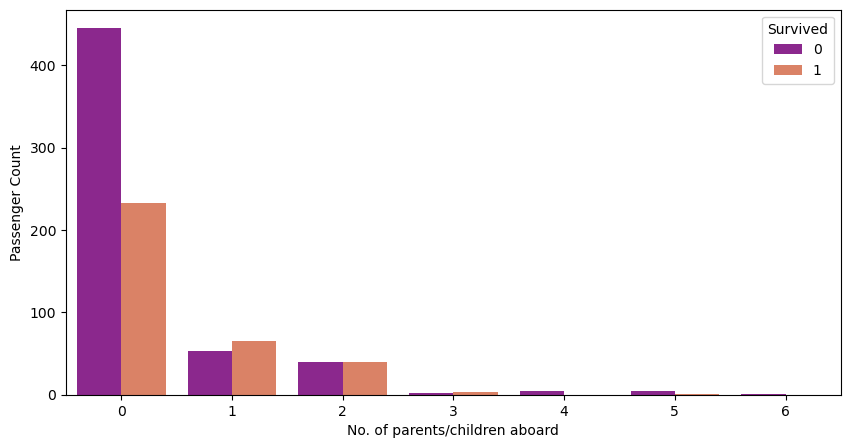

In [95]:
plt.figure(figsize=(10,5))
sns.countplot(x='Parch',data=new_df,palette='plasma',hue='Survived')
plt.xlabel('No. of parents/children aboard')
plt.ylabel('Passenger Count')
plt.show()

**The passengers with 0 parents ,most of them did'not survive as same as SibSp**

# Embarked

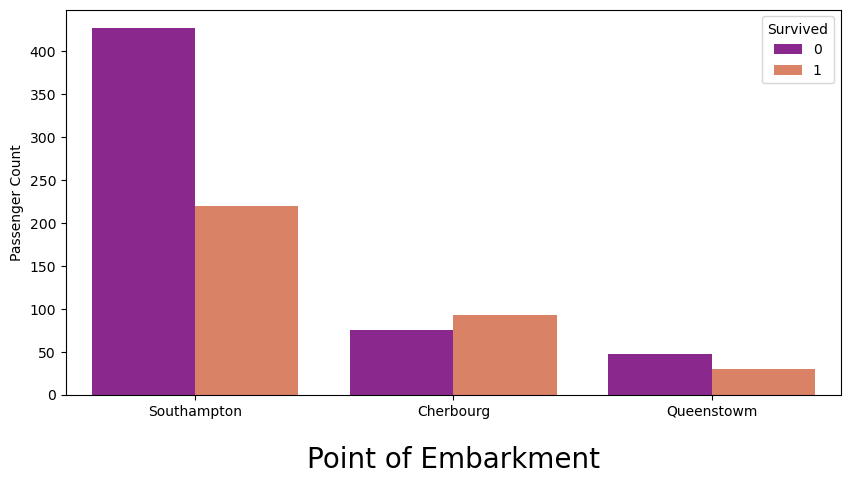

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(x='Embarked',data=new_df,palette='plasma',hue='Survived')
plt.xlabel('Point of Embarkment',size=20,labelpad=20)
plt.xticks((0, 1, 2),['Southampton','Cherbourg','Queenstowm'])
plt.ylabel('Passenger Count')
plt.show()

**Passengers boarded in Southampton,most of them did not Survive**

# Gender

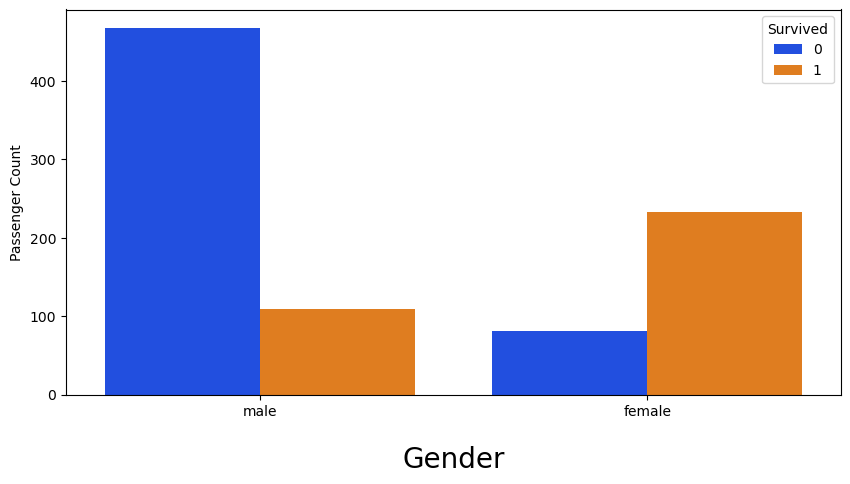

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64


In [97]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex',data=new_df,palette='bright',hue='Survived')
plt.xlabel('Gender',size=20,labelpad=20)
plt.ylabel('Passenger Count')
plt.show()


print(df.groupby(['Sex','Survived'])['Survived'].count())

**Female have High survival percentange(233 survived) and male have Low survival percentage(109 survived) from this , first preference was given to women first**

# Multivariate Analysis

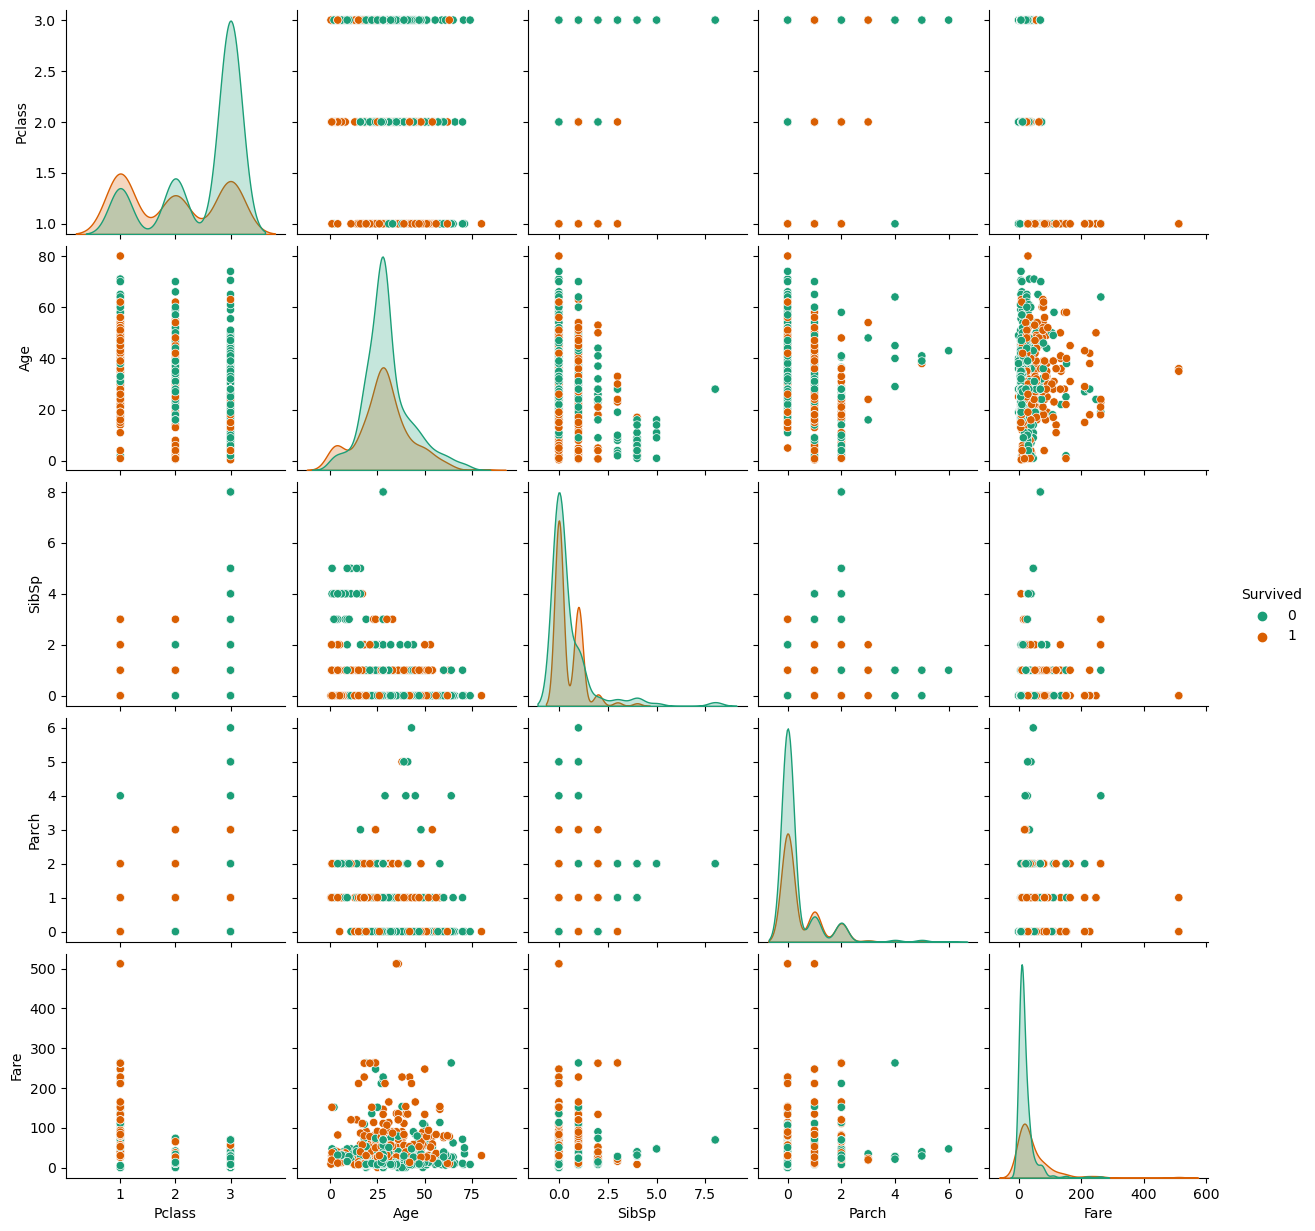

In [98]:
sns.pairplot(new_df,hue='Survived',palette='Dark2')
plt.show()

**Pclass is related to the survival rate.The passengers in the third class have more survival rate when compare to other two classes**

**The largest number of passengers who did not survive were in the range of age 20 to 40 years old**

# Checking for Outliers(using boxplot)

# Age Feature

Text(0.5, 0, 'Age')

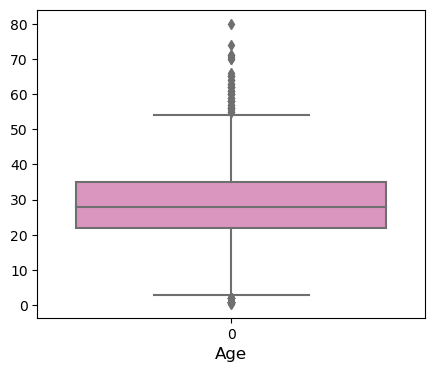

In [99]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(new_df['Age'],palette="Set2_r")
plt.xlabel('Age',fontsize=12)

# Fare Feature

Text(0.5, 0, 'Fare')

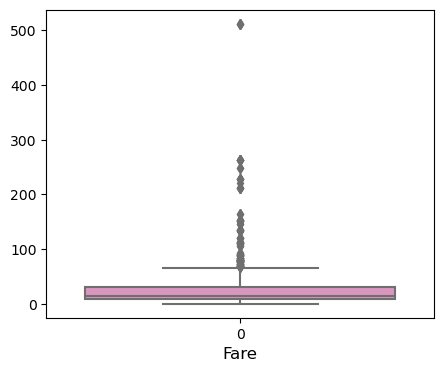

In [100]:
plt.figure(figsize=(5,4),facecolor ="white")
sns.boxplot(new_df['Fare'],palette="Set2_r")
plt.xlabel('Fare',fontsize=12)

**from above analysis we can see outliers presented clearly in the age and fare columns,retaining much data as possible from outliers**

# Encoding

In [101]:
OE=OrdinalEncoder()
for i in new_df.columns:
    if new_df[i].dtypes=='object':
        new_df[i]=OE.fit_transform(new_df[i].values.reshape(-1,1))

new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.0,0,0,13.0000,2.0
887,1,1,0.0,19.0,0,0,30.0000,2.0
888,0,3,0.0,28.0,1,2,23.4500,2.0
889,1,1,1.0,26.0,0,0,30.0000,0.0


# Checking for Skewness

# Age Feature

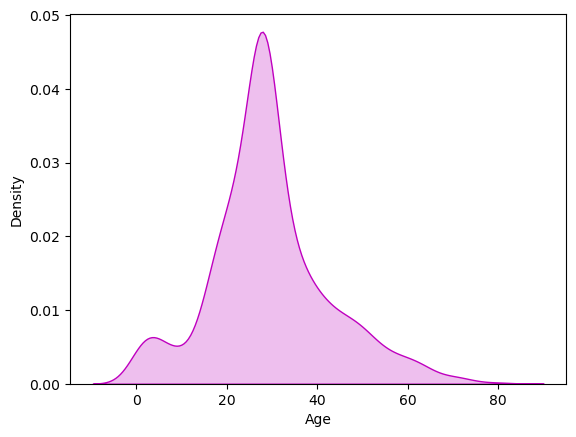

In [103]:
sns.distplot(df['Age'],color='m',kde_kws={"shade":True},hist = False)
plt.show()

# Fare Feature

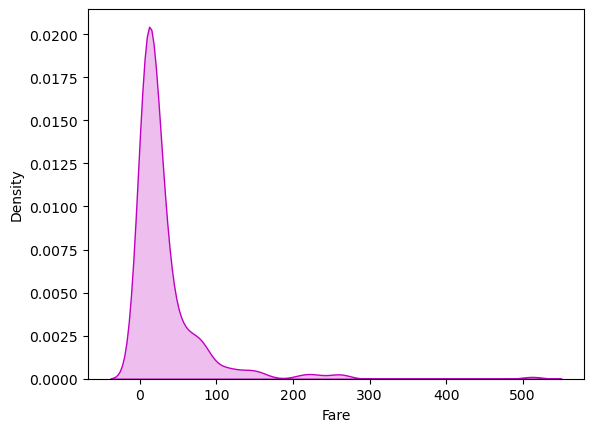

In [104]:
sns.distplot(df['Fare'],color='m',kde_kws={"shade":True},hist = False)
plt.show()

**From above analysis,skewness has presented in Age and Fare features**

In [105]:
new_df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.510245
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

**Acceptable range for skewness is -0.5 to 0.5**

**Ignore the categorical column skewness,we can see the skewness is presented in Fare and age column, we will deal this**

# Removing Skewness(using cuberoot)

In [106]:
new_df['Age']=np.cbrt(new_df['Age'])

In [107]:
new_df['Fare']=np.cbrt(new_df['Fare'])

# Correlation Using heatmap

In [113]:
new_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.102376,-0.035322,0.081629,0.322398,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.281259,0.083081,0.018443,-0.656224,0.162098
Sex,-0.543351,0.131900,1.000000,0.082145,-0.114631,-0.245489,-0.251434,0.108262
Age,-0.102376,-0.281259,0.082145,1.000000,-0.286156,-0.255418,0.057170,-0.017946
SibSp,-0.035322,0.083081,-0.114631,-0.286156,1.000000,0.414838,0.283371,0.068230
Parch,0.081629,0.018443,-0.245489,-0.255418,0.414838,1.000000,0.307687,0.039798
Fare,0.322398,-0.656224,-0.251434,0.057170,0.283371,0.307687,1.000000,-0.220735
Embarked,-0.167675,0.162098,0.108262,-0.017946,0.068230,0.039798,-0.220735,1.000000


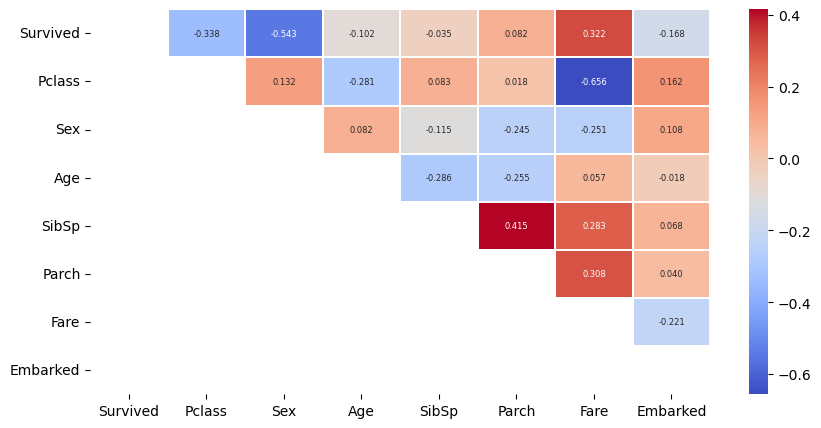

In [115]:
new_df_corr=new_df.corr()

lower_triangle=np.tril(new_df.corr())

plt.figure(figsize=(10,5))

sns.heatmap(new_df_corr,annot=True,annot_kws={"size":6},cmap='coolwarm',linewidths=0.1,fmt='.3f',mask=lower_triangle)

plt.show()

**==>0-no relation**

**==>-0.3 to 0.3 less relation**

**==>greater than -0.5 or 0.5 greater than(moderate correlation)**

**==>greater than -0.7 or 0.7 greater than(high correlation)**

**1) From above heatmap we can see,there are positive correlation and negative correlation between label and feature columns**

**2)Survived and Pclass are negatively correlated with a value of -0.338 (Moderate correlation),Passengers with higher class(lower Pclass value) had better survival rates**

**3)Survived and Sex are negatively correlated with a value of -0.543 (High correlation),it shows one gender had high Survival rate**

**4)Survived and Fare are postively correlated with a value of 0.322 (Moderate correlation),Passengers who paid more had slightly better chances of Survival**

**5)Pclass and Fare are negtively correlated with a value of -0.656 (High correlation),Passengers who paid more had slightly better chances of Survival**

**6)Sibsp and Parch are postively correlated with a value of 0.415 (High correlation)**

**7)Parch and Fare are postively correlated with a value of 0.308 (Moderate correlation)**

# Separting features and labels(to build model)¶

In [118]:
x=new_df.drop('Survived',axis=1)
y=new_df['Survived']

In [119]:
x #Feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,2.802039,1,0,1.935438,2.0
1,1,0.0,3.361975,1,0,4.146318,0.0
2,3,0.0,2.962496,0,0,1.993730,2.0
3,1,0.0,3.271066,1,0,3.758647,2.0
4,3,1.0,3.271066,0,0,2.004158,2.0
...,...,...,...,...,...,...,...
886,2,1.0,3.000000,0,0,2.351335,2.0
887,1,0.0,2.668402,0,0,3.107233,2.0
888,3,0.0,3.036589,1,2,2.862294,2.0
889,1,1.0,2.962496,0,0,3.107233,0.0


In [120]:
y  #Label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [122]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Imbalanced data presented in target variable,we have to Balance it**

# OverSampling

In [123]:
SME=SMOTE()
x,y=SME.fit_resample(x,y)

In [124]:
y.value_counts()

Survived
0    549
1    549
Name: count, dtype: int64

In [130]:
print("Feature Shape:",x.shape)

print("Label Shape:",y.shape)

Feature Shape: (1098, 7)
Label Shape: (1098,)


**we could see the data are balanced now**

In [131]:
x #displaying feature

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.000000,2.802039,1,0,1.935438,2.0
1,1,0.000000,3.361975,1,0,4.146318,0.0
2,3,0.000000,2.962496,0,0,1.993730,2.0
3,1,0.000000,3.271066,1,0,3.758647,2.0
4,3,1.000000,3.271066,0,0,2.004158,2.0
...,...,...,...,...,...,...,...
1093,3,0.000000,0.908560,2,1,2.680439,0.0
1094,2,0.000000,3.053606,0,0,2.263224,2.0
1095,2,0.000000,2.300634,2,1,3.176097,2.0
1096,2,0.031388,3.036589,0,0,3.227296,2.0


In [134]:
print(y.to_frame()) #displaying label

      Survived
0            0
1            1
2            1
3            1
4            0
...        ...
1093         1
1094         1
1095         1
1096         1
1097         1

[1098 rows x 1 columns]


# Feature Scaling using Standard Scalarisation

In [135]:
scalar=StandardScaler()
x=pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.899099,0.865439,-0.307139,0.488884,-0.491445,-0.833713,0.607960
1,-1.448608,-1.168740,0.682130,0.488884,-0.491445,1.160225,-1.876706
2,0.899099,-1.168740,-0.023652,-0.488884,-0.491445,-0.781141,0.607960
3,-1.448608,-1.168740,0.521516,0.488884,-0.491445,0.810594,0.607960
4,0.899099,0.865439,0.521516,-0.488884,-0.491445,-0.771737,0.607960
...,...,...,...,...,...,...,...
1093,0.899099,-1.168740,-3.652451,1.466651,0.799480,-0.161815,-1.876706
1094,-0.274754,-1.168740,0.137318,-0.488884,-0.491445,-0.538091,0.607960
1095,-0.274754,-1.168740,-1.192999,1.466651,0.799480,0.285206,0.607960
1096,-0.274754,-1.104891,0.107252,-0.488884,-0.491445,0.331382,0.607960


# Checking Variance inflation factor (VIF)¶

In [138]:
vif=pd.DataFrame()
vif['VIF values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

vif

,VIF values,features
0,2.366816,Pclass
1,1.114082,Sex
2,1.223342,Age
3,1.357217,SibSp
4,1.390903,Parch
5,2.658667,Fare
6,1.076917,Embarked


**If VIF value is greater than 10,consider it as a sign of multicollinearity but our features does not have the value greater than 10**

# Modeling

# Find the best random state

In [140]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Best Accuracy is ",maxAccu,"at random state",maxRS)

Best Accuracy is  1.0 at random state 2


# Creating train test split

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=2)

# Creating a Function with accuracy score,classification report and difference between accuracy score and cross validation

In [142]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n================Train Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")  #accuracy score for train result
              
    
    elif train==False:
        pred=clf.predict(x_test)
              
        print("\n================Test Result=============")
        
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")  #accuracy score for test result
              
        print("\n \n Test Classification Report \n",classification_report(y_test,pred,digits=2)) #classification result for test result
        
        
        score=cross_val_score(clf,x,y)
        print(score)
        print(score.mean())
        print("Difference between accuracy score and cross validation is:",accuracy_score(y_test,pred)-score.mean()) #Difference between accuracy score and cross validation(to find which model is best)

# LogisticRegression

In [143]:
clf=LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [144]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:80.62%

================Test Result=============
Accuracy Score:80.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.72      0.81        18
           1       0.69      0.92      0.79        12

    accuracy                           0.80        30
   macro avg       0.81      0.82      0.80        30
weighted avg       0.83      0.80      0.80        30

[0.77272727 0.81818182 0.75909091 0.84474886 0.83105023]
0.805159817351598
Difference between accuracy score and cross validation is: -0.005159817351597984


# RandomForestClassifier

In [145]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [146]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:98.31%

================Test Result=============
Accuracy Score:100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.77272727 0.81363636 0.80454545 0.90410959 0.84474886]
0.8279535076795351
Difference between accuracy score and cross validation is: 0.17204649232046487


# SVC

In [147]:
clf=SVC()
clf.fit(x_train,y_train)

SVC()

In [148]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:83.05%

================Test Result=============
Accuracy Score:83.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        18
           1       0.82      0.75      0.78        12

    accuracy                           0.83        30
   macro avg       0.83      0.82      0.82        30
weighted avg       0.83      0.83      0.83        30

[0.78181818 0.81818182 0.77272727 0.87214612 0.85844749]
0.8206641760066418
Difference between accuracy score and cross validation is: 0.012669157326691605


# GradientBoostingClassifier

In [149]:
clf=GradientBoostingClassifier()
clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [150]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:88.95%

================Test Result=============
Accuracy Score:83.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.77      0.83      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30

[0.80454545 0.81818182 0.8        0.89497717 0.87671233]
0.8388833540888335
Difference between accuracy score and cross validation is: -0.005550020755500151


# AdaBoostClassifier

In [151]:
clf=AdaBoostClassifier()
clf.fit(x_train,y_train)

AdaBoostClassifier()

In [152]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:83.61%

================Test Result=============
Accuracy Score:83.33%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.72      0.84        18
           1       0.71      1.00      0.83        12

    accuracy                           0.83        30
   macro avg       0.85      0.86      0.83        30
weighted avg       0.88      0.83      0.83        30

[0.71818182 0.83181818 0.78181818 0.86757991 0.84931507]
0.8097426317974262
Difference between accuracy score and cross validation is: 0.023590701535907144


# ExtraTreesClassifier

In [153]:
clf=ExtraTreesClassifier()
clf.fit(x_train,y_train)

ExtraTreesClassifier()

In [154]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:98.31%

================Test Result=============
Accuracy Score:100.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[0.78636364 0.80454545 0.82272727 0.89497717 0.85844749]
0.8334122042341221
Difference between accuracy score and cross validation is: 0.1665877957658779


# BaggingClassifier

In [155]:
clf=BaggingClassifier()
clf.fit(x_train,y_train)

BaggingClassifier()

In [156]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:97.00%

================Test Result=============
Accuracy Score:90.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        18
           1       0.85      0.92      0.88        12

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[0.79545455 0.82272727 0.82272727 0.89041096 0.88127854]
0.8425197177251972
Difference between accuracy score and cross validation is: 0.05748028227480284


# Desicion Tree Classifier

In [157]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [158]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)
metric_score(clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=============
Accuracy Score:98.31%

================Test Result=============
Accuracy Score:90.00%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.80      1.00      0.89        12

    accuracy                           0.90        30
   macro avg       0.90      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30

[0.73636364 0.81363636 0.80454545 0.87671233 0.82648402]
0.8115483603154836
Difference between accuracy score and cross validation is: 0.08845163968451641


# Checking Difference between accuracy score and cross validation,the model GradientBoostingClassifier has lowest value so GradientBoostingClassifier is our best model

# HyperParameter Tuning

In [159]:
param_grid={'n_estimators':[100,200,300],
           'max_depth':[3,4,5],
           'learning_rate':[0.01,0.1,0.2],
           'min_samples_leaf':[1,2,3],
           'max_features':['auto','sqrt']}

In [160]:
GV=GridSearchCV(GradientBoostingClassifier(),param_grid,cv=5)

In [161]:
GV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [162]:
GV.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'n_estimators': 200}

# Final Model

In [164]:
final_model=GradientBoostingClassifier(learning_rate=0.1,
 max_depth= 3,
 max_features ='auto',
 min_samples_leaf=3,
 n_estimators= 200)

In [165]:
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

86.66666666666667


# Threshold

In [166]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)

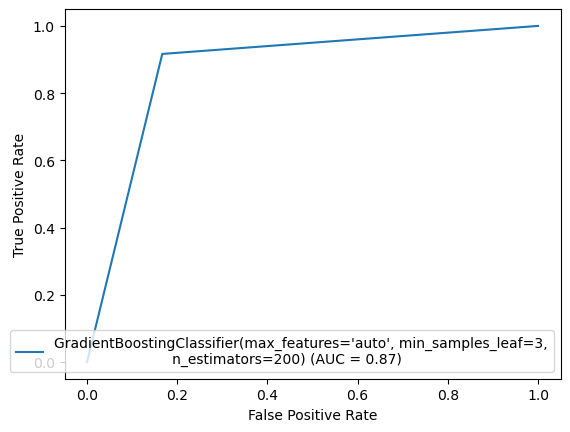

In [167]:
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

# Saving the model

In [168]:
joblib.dump(final_model,'Titanic survived Project.pkll')

['Titanic survived Project.pkll']

# Predicting the saved Model

In [169]:
model=joblib.load('Titanic survived Project.pkll')

In [170]:
prediction=model.predict(x_test)
prediction

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [171]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

,Predicted,Original
0,0,0
1,0,0
2,1,1
3,0,0
4,1,0
5,0,0
6,0,0
7,1,1
8,1,1
9,1,1
